In [2]:
import pandas as pd 
import matplotlib.pyplot as plt

Course Requirement 1: Read data in. 

In [5]:
#open imdb basics tsv.gz files with tab delimiter
df = pd.read_csv('https://datasets.imdbws.com/title.basics.tsv.gz', sep='\t', low_memory=False) 

#print column headers
my_list = list(df)
print(my_list)



['tconst', 'titleType', 'primaryTitle', 'originalTitle', 'isAdult', 'startYear', 'endYear', 'runtimeMinutes', 'genres']


Course requirement 2: manipulate and clean data. How: Extracting specific columns from the existing dataframe created by reading in the tsv file. 

In [6]:
#create second dataframe, extracting specific columns for analysis
df2 = df[['tconst', 'titleType', 'primaryTitle']]



Course requirement 1 again: Read in more data. The first dataset has a lot of data, but not the ratings and votes information, which is found in this another file. So I had to import the ratings file.  

In [7]:
df3 = pd.read_csv('https://datasets.imdbws.com/title.ratings.tsv.gz', sep='\t')
df3.head()

,tconst,averageRating,numVotes
0,tt0000001,5.7,1922
1,tt0000002,5.8,259
2,tt0000003,6.5,1733
3,tt0000004,5.6,174
4,tt0000005,6.2,2544


Course requirement 2 again: Create a new dataframe by combining the two datasets above. 

In [8]:
#merge extracted df and ratings df into one usable construct
df_merge = pd.merge(df2, df3, how = 'inner', on ='tconst')
df_merge.head()

,tconst,titleType,primaryTitle,averageRating,numVotes
0,tt0000001,short,Carmencita,5.7,1922
1,tt0000002,short,Le clown et ses chiens,5.8,259
2,tt0000003,short,Pauvre Pierrot,6.5,1733
3,tt0000004,short,Un bon bock,5.6,174
4,tt0000005,short,Blacksmith Scene,6.2,2544


Course requirement 2: More data cleaning, filtering out all non-movies from the dataset. There are a LOT of tv shows and shorts included with the IMDB dataset that I'm not interested in working with just yet. 

In [9]:
# filter out all Non-movie rows
df_merge2 = df_merge[df_merge['titleType'] == 'movie']
df_merge2.head()

,tconst,titleType,primaryTitle,averageRating,numVotes
8,tt0000009,movie,Miss Jerry,5.2,200
325,tt0000502,movie,Bohemios,4.2,14
357,tt0000574,movie,The Story of the Kelly Gang,6.0,794
364,tt0000591,movie,The Prodigal Son,5.1,20
378,tt0000615,movie,Robbery Under Arms,4.3,23


Course requirement 3: 
Analysis 1. What is the length of the dataset? 

In [10]:
#start feature analysis here: length and shape of new dataframe/how much data do I have?
#dataset size
print(len(df_merge2)) 

#dataset shape
print(df_merge2.shape) 

282645
(282645, 5)


Course requirement 3: 
Analysis 2: What is the average rating of the movies in this dataset?

In [11]:
#Feature 2: Average ratings of dataset
df_ratings = df_merge2['averageRating'].mean() #find average or mean of averageRating column


Course requirement 3:
Analysis 3: What are the basic stats for this dataset? How much info can I obtain from the describe function?

In [12]:
#Feature 3: all stats for this dataset
df_ratings2 = df_merge2.describe()
df_ratings2

,averageRating,numVotes
count,282645.000000,2.826450e+05
mean,6.183770,3.562504e+03
std,1.361383,3.459738e+04
min,1.000000,5.000000e+00
25%,5.400000,1.900000e+01
50%,6.300000,6.000000e+01
75%,7.100000,3.070000e+02
max,10.000000,2.658775e+06


Course requirement 3:
Analsysis 4: What is the average number of votes each movie received?

In [13]:
#Feature 3: Average of number of votes each title received
df_votes = df_merge2['numVotes'].mean()
df_votes

3562.503610536185

Course requirement 3:
Analysis 5: Filter out all movies with an average rating of less than 7.5. How many movies does this leave me?

In [17]:
# filter rows with average rating greater than 7.5
df_filtered_rating = df_merge2[df_merge2['averageRating'] >= 7.5]
df_filtered_rating.head()

print(len(df_filtered_rating))


46383


Answer: Too many movies. (46383)

Course requirement 3:
Analysis 6: More filtering of data, removing anything with more than 75 votes.

Still too many movies?

In [19]:
#filter rows with average number of votes <= 75
df_filtered_votes = df_filtered_rating[df_filtered_rating['numVotes'] <= 75]
df_filtered_votes.head()

print(len(df_filtered_votes))

33913


Answer: Yes. I do not want to attempt to watch 33000 movies. 

Course requirement 3:
Analysis 7 (I lost count) Sort data in descending order. 

In [20]:
#sort data in descending order and print head
sorted_df = df_filtered_votes.sort_values(by=['averageRating'], ascending=False)
sorted_df.head()

,tconst,titleType,primaryTitle,averageRating,numVotes
660980,tt14626184,movie,Scrum,10.0,19
768567,tt1847567,movie,Coyote Requiem,10.0,9
1171252,tt7860124,movie,Guru Geethaya,10.0,7
698312,tt15553478,movie,Blemish,10.0,6
556652,tt12273854,movie,Mile 19,10.0,9


Course requirement 4: Plot data with matplotlib. I created a histogram using the average score and number of votes. 

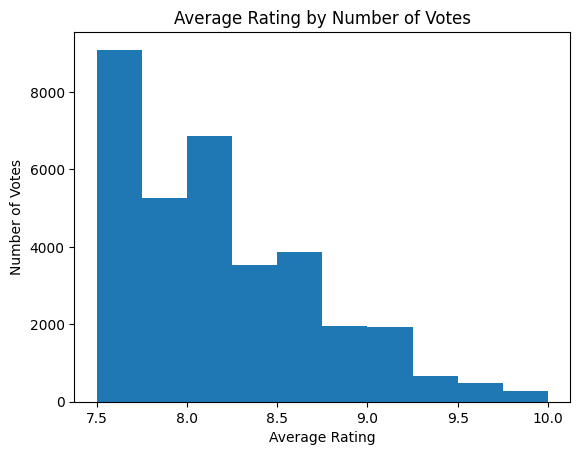

In [21]:
# create histogram of sorted data
plt.hist(sorted_df['averageRating'])

plt.title('Average Rating by Number of Votes')
plt.ylabel('Number of Votes')
plt.xlabel('Average Rating')
plt.show() 

Course requirement 3:
I filtered out everything that scored a 10 out of sheer curiosity. 

In [25]:
# filter rows with average rating equals 10
df_filtered_rating2 = df_merge2[df_merge2['averageRating'] == 10]
df_filtered_rating2.head()

print(len(df_filtered_rating2))

122


Course requirement 4: Create a second plot. I created a scatterplot with matplotlib. 

<function matplotlib.pyplot.show(close=None, block=None)>

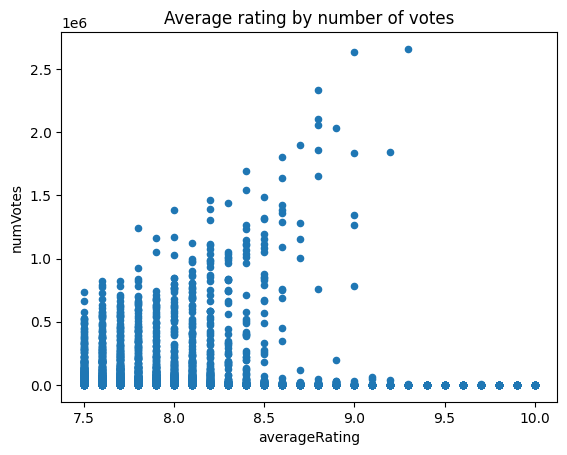

In [28]:
df_filtered_rating.plot(kind='scatter', x ='averageRating', y = 'numVotes')
plt.title('Average rating by number of votes')

plt.show


Bonus analysis! I wanted to find any horror movies that have a score of 10, but not a lot of votes. 

In [29]:
#create new dataframe, including genre information
df_horror = df[['tconst', 'titleType', 'primaryTitle', 'genres']]
df_horror.head()


,tconst,titleType,primaryTitle,genres
0,tt0000001,short,Carmencita,"Documentary,Short"
1,tt0000002,short,Le clown et ses chiens,"Animation,Short"
2,tt0000003,short,Pauvre Pierrot,"Animation,Comedy,Romance"
3,tt0000004,short,Un bon bock,"Animation,Short"
4,tt0000005,short,Blacksmith Scene,"Comedy,Short"


Merging two datasets again, this time including genre information. 

In [ ]:
#merge extracted df and ratings df into one usable construct
df_horror_merge = pd.merge(df_horror, df3, how = 'inner', on ='tconst')
df_horror_merge.head()

Filtering out all non-movies again.

In [ ]:
# filter out all Non-movie rows
df_horror_2 = df_horror_merge[df_horror_merge['titleType'] == 'movie'] 
df_horror_2.head()

Filtering out only horror movies. 

In [ ]:
# filter out all Horror movie rows
df_horror_3 = df_horror_2[df_horror_2['genres'] == 'Horror'] 
df_horror_3.head()

Filter out all horror movies with a score of 8.5 or higher. 

In [ ]:
# filter rows with average rating greater than or equal to 8.5
df_filtered_horror = df_horror_3[df_horror_3['averageRating'] >= 8.5]
df_filtered_horror.head()

In [ ]:
# filter rows with less than 75 votes
df_horror_votes = df_filtered_horror[df_filtered_horror['numVotes'] <= 75]
df_horror_votes.head()


In [ ]:
# filter rows with average rating of 9.5
df_horror_10 = df_horror_votes[df_horror_votes['averageRating'] >= 9.5]
df_horror_10.head()